In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import seaborn as sns
import numpy as np

In [139]:
data = pd.read_csv('farms_train.csv', delimiter=';', decimal=',')

data = data.dropna()

X = data.drop(columns=["DIFF"])
y = data["DIFF"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel='linear',probability=True, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='recall')
f1_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='f1')


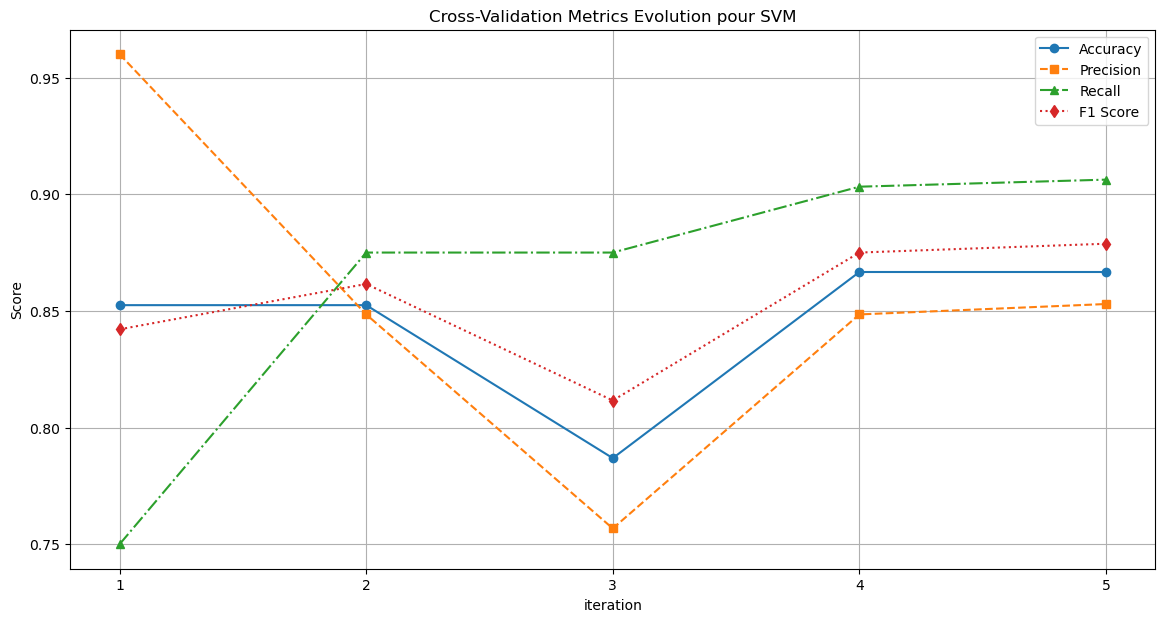

Mean Accuracy: 0.85
Mean Precision: 0.85
Mean Recall: 0.86
Mean F1 Score: 0.85


In [140]:
plt.figure(figsize=(14, 7))
plt.plot(range(1, 6), accuracy_scores, marker='o', label='Accuracy', linestyle='-')
plt.plot(range(1, 6), precision_scores, marker='s', label='Precision', linestyle='--')
plt.plot(range(1, 6), recall_scores, marker='^', label='Recall', linestyle='-.')
plt.plot(range(1, 6), f1_scores, marker='d', label='F1 Score', linestyle=':')

plt.title('Cross-Validation Metrics Evolution pour SVM')
plt.xlabel('iteration')
plt.ylabel('Score')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

print(f'Mean Accuracy: {np.mean(accuracy_scores):.2f}')
print(f'Mean Precision: {np.mean(precision_scores):.2f}')
print(f'Mean Recall: {np.mean(recall_scores):.2f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.2f}')

In [141]:
y_pred_proba = cross_val_predict(svm_classifier, X_scaled, y, cv=cv, method='predict_proba')
fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

<Figure size 1000x600 with 0 Axes>

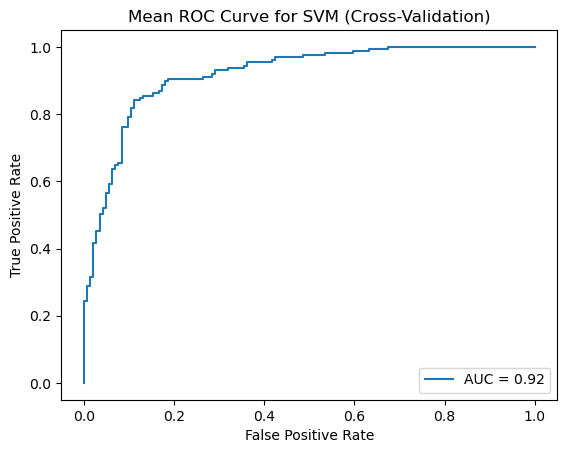

In [142]:

plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('Mean ROC Curve for SVM (Cross-Validation)')
plt.show()

In [143]:
# Afficher les moyennes et les écarts-types des scores
print(f'Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}')
print(f'Mean Precision: {np.mean(precision_scores):.2f} ± {np.std(precision_scores):.2f}')
print(f'Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}')
print(f'Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}')

Mean Accuracy: 0.85 ± 0.03
Mean Precision: 0.85 ± 0.06
Mean Recall: 0.86 ± 0.06
Mean F1 Score: 0.85 ± 0.02


In [144]:
# Charger les nouvelles données de test
test_data = pd.read_csv('farms_test.csv', delimiter=';', decimal=',')

# Nettoyer les données de test (supprimer les valeurs manquantes)
test_data = test_data.dropna()

# Appliquer le même scaler sur les données de test
X_test_scaled = scaler.transform(test_data)

# Faire des prédictions sur les données de test
y_pred = svm_classifier.predict(X_test_scaled)

# Si tu veux voir les probabilités des classes (facultatif)
y_pred_proba = svm_classifier.predict_proba(X_test_scaled)

# Afficher les prédictions
print("Prédictions :", y_pred)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.